<a href="https://colab.research.google.com/github/shahriar-tamjid/time-series-analysis/blob/main/Time_Series_Analysis_of_Road_Accidents_in_Dhaka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **What is Time Series?**

Time Series is a set of observations on the values that a variable takes at different times. For example: Sales Trend, Stock Market Price, Weather Forecast etc. Time Series is using to predict the future values based on the previous observed value.

# **Component of Time Series**

* **Trend**: Tend may show the growth or decline in a time series over a long period. This is the type of tendency which continues to persist for a very long period. Prices and export and import data, for example, reflect obviously increasing tendencies over time.

* **Seasonality**: These are short term movements occurring in data due to seasonal factors. The short term is generally considered as a period in which changes occur in a time series with variations in weather or festivities

* **Irregularity**: These are sudden changes occurring in a time series which are unlikely to be repeated. They are components of a time series which cannot be explained by trends, seasonal or cyclic movements. These variations are sometimes called residual or random components.

* **Cyclic**: These are long term oscillations occurring in a time series. These oscillations are mostly observed in economics data and the periods of such oscillations are generally extended from five to twelve years or more. These oscillations are associated with the well known business cycles.

# **What is ARIMA model?**

ARIMA stands for Auto Regressive Integrated Moving Average. There are seasonal and Non-seasonal ARIMA models that can be used for forecasting An ARIMA model is characterized by 3 terms: p, d, q where p is the order of the AR term, q is the order of the MA term and d is the number of differencing required to make the time series stationary. If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA. More on that once we finish ARIMA.

# **Import Libraries and Setup Environment**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use('ggplot')
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

**Import Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/GoogleColab2/Data Analysis/Time-Series Analysis/Dhaka_Accident.csv')
df.head()

,Date,Total_Accident
0,01/01/2014,27
1,02/01/2014,33
2,03/01/2014,31
3,04/01/2014,27
4,05/01/2014,27


**Convert the Date column to Date type**

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

<ipython-input-5-68239123ebe5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Total_Accident
0,2014-01-01,27
1,2014-02-01,33
2,2014-03-01,31
3,2014-04-01,27
4,2014-05-01,27


**Sorting the data by Date**

In [6]:
df = df.sort_values(by=['Date'])
df.head()

,Date,Total_Accident
0,2014-01-01,27
31,2014-01-02,41
59,2014-01-03,39
90,2014-01-04,43
120,2014-01-05,43


**Set the Date for index**

In [7]:
accident = df.set_index('Date')
accident.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq=None)

**Extract the Average Number of Accident in Each Month**

In [8]:
y = accident['Total_Accident'].resample('MS').mean()
y.head()

Date
2014-01-01    41.419355
2014-02-01    37.821429
2014-03-01    39.161290
2014-04-01    38.633333
2014-05-01    39.903226
Freq: MS, Name: Total_Accident, dtype: float64

# **Visualize the Number of Accident in Each Year**

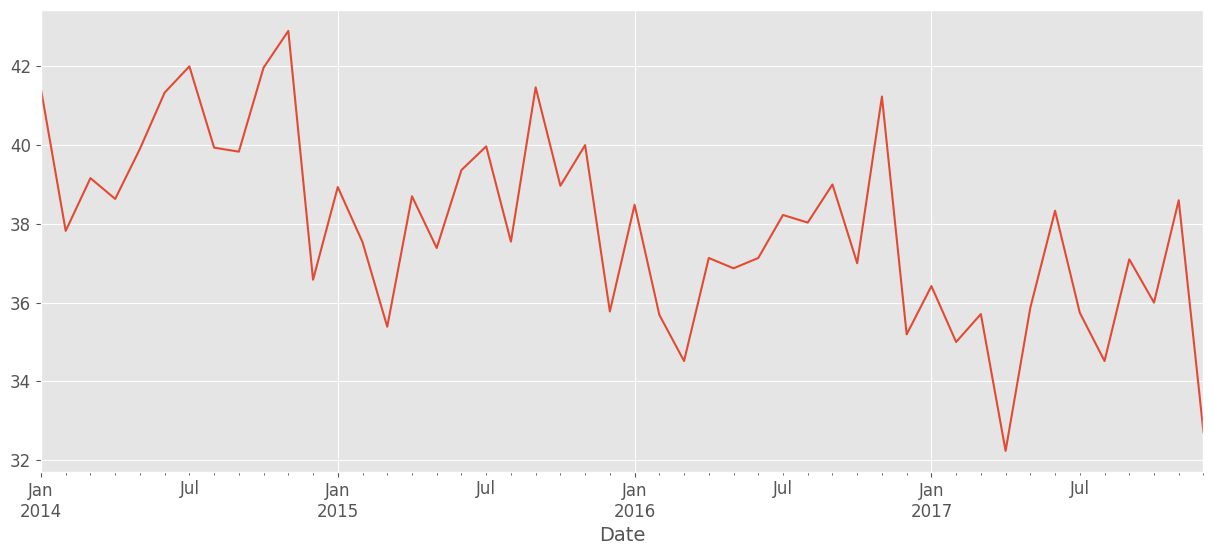

In [9]:
y.plot(figsize=(15, 6))
plt.show()

Visualize the data using **Time-Series Decomposition** that allows us to decompose our time series into three distinct components: **Trend**, **Seasonality**, and **Noise**.

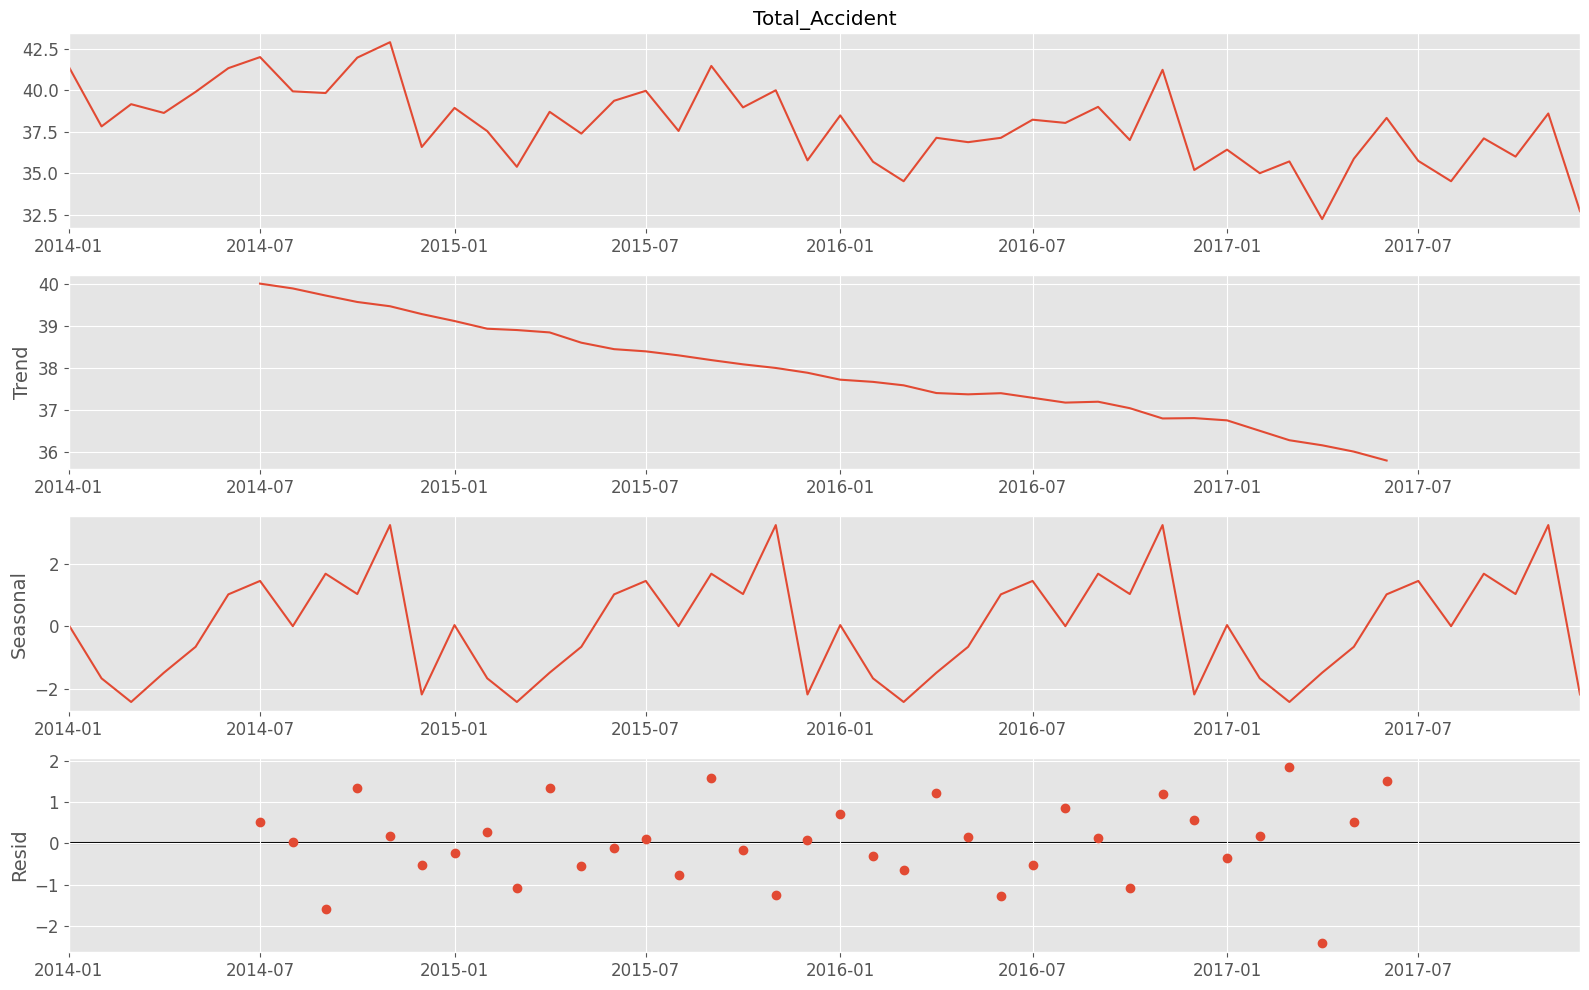

In [10]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# **Parameter Selection for ARIMA Time Series Model**

Our goal here is to use a **“Grid Search”** to find the optimal set of parameters that yields the best performance for our model.

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:487.36839948594854


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1992.4721811585173
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:157.24517232200796
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:157.97841120884124
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:280.5831665260769
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:281.320952955576
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:157.24915205950674


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:158.04221745863543
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:432.8574483178135


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1951.5362759614598
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:156.10828210816942
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:157.90630615419477
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:271.46542113960834
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:273.46362163570626
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:157.85410721134787


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:159.49943526434282
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:225.72066255629233
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1971.216887126124
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:162.62495905851418
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:157.25485055829733
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:213.63254560576405


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2281.212339496302
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:161.6089286091498
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:159.2543415337748
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:207.9149555039632


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1709.6908314149625
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:135.17914333388302
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:129.5797040282708
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:187.07284731255936


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1599.7316395368564
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:133.54181980008707
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:131.55830999372492
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:237.74195445439807
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2092.2853208358083
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:155.14119638238165
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:157.111237665126


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:225.40542609128167
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:222.00997301034425
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:157.11256183539254


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:159.11014971738368
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:220.01760598225485


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1518.128808295817


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:140.80544623035573


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:135.18171716102722
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:199.18911834898438
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:196.1846095991395


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parame

ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:139.09506681561922


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:137.15625804375546
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:211.0414076545536
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1985.621393610931
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:155.05128060272884
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:148.84686666869726


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:202.48507457097594


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1658.441948068827
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:152.6047921240969
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:150.7199601960652
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:209.91004776525608
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1986.0590489828066
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:134.42668716285394


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:128.18222713778096
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:188.008666030933


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1904.0942963890811
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:131.94963484665723


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:130.0877227073024


The above output suggests that **SARIMAX (1, 1, 1)x(1, 1, 1, 12)** yields the lowest AIC value of **130.088**. Therefore we should consider this to be optimal option.

**Fitting the ARIMA model**

In [13]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3077      0.212     -1.451      0.147      -0.723       0.108
ma.L1         -1.0000   1339.021     -0.001      0.999   -2625.434    2623.434
ar.S.L12      -0.0899      0.649     -0.139      0.890      -1.361       1.182
ma.S.L12      -1.0001   4520.826     -0.000      1.000   -8861.657    8859.656
sigma2         0.9370   5021.991      0.000      1.000   -9841.984    9843.858


**Run Model Diagnostics to Investigate any Unusual Behavior**

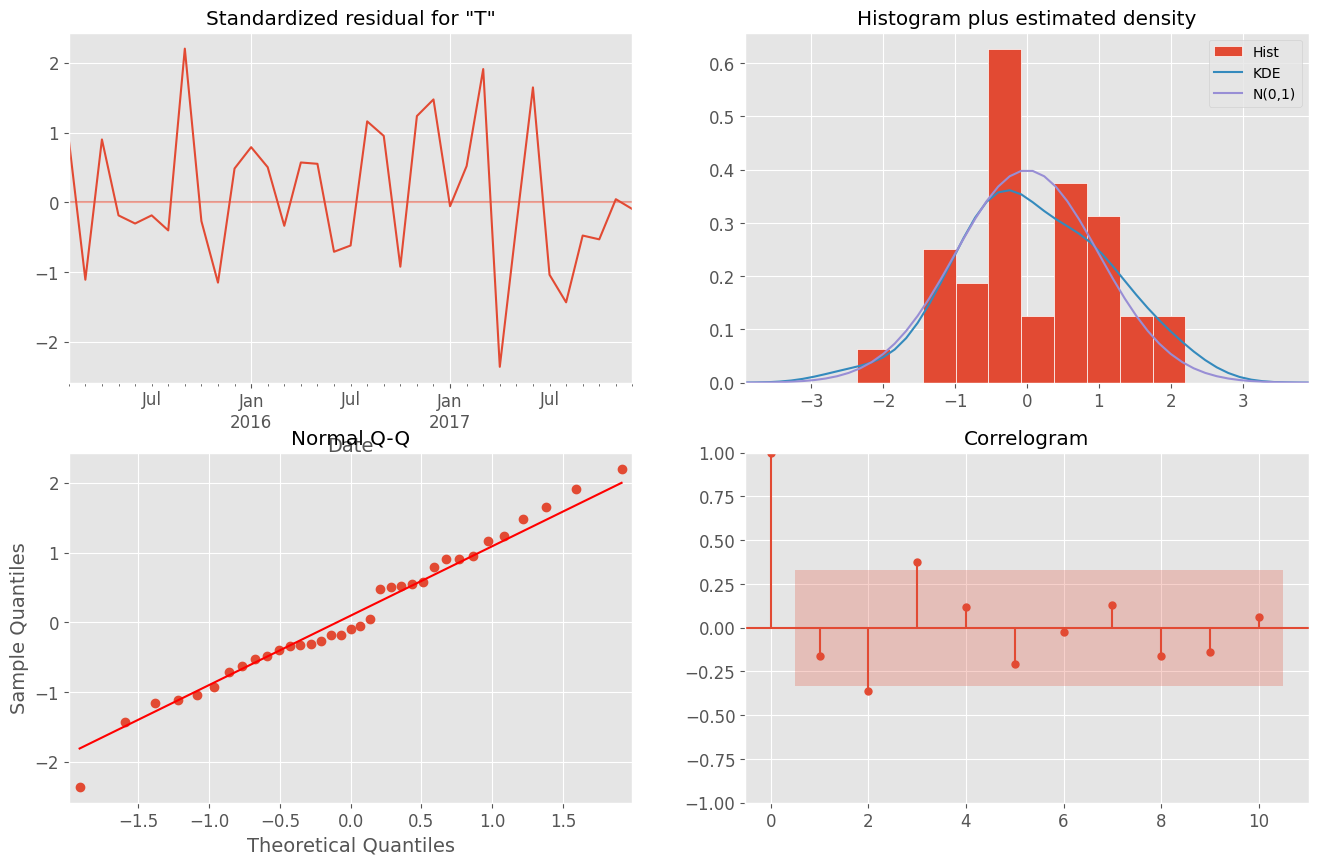

In [14]:
results.plot_diagnostics()
plt.show()

# **Evaluation of Forecasts**

In odrer to understand the accuracy of our forecasts, we compare predicted number of accident to real number of accidents of the time series, and we set forecasts to start at **2017–01–01** to the end of the data.

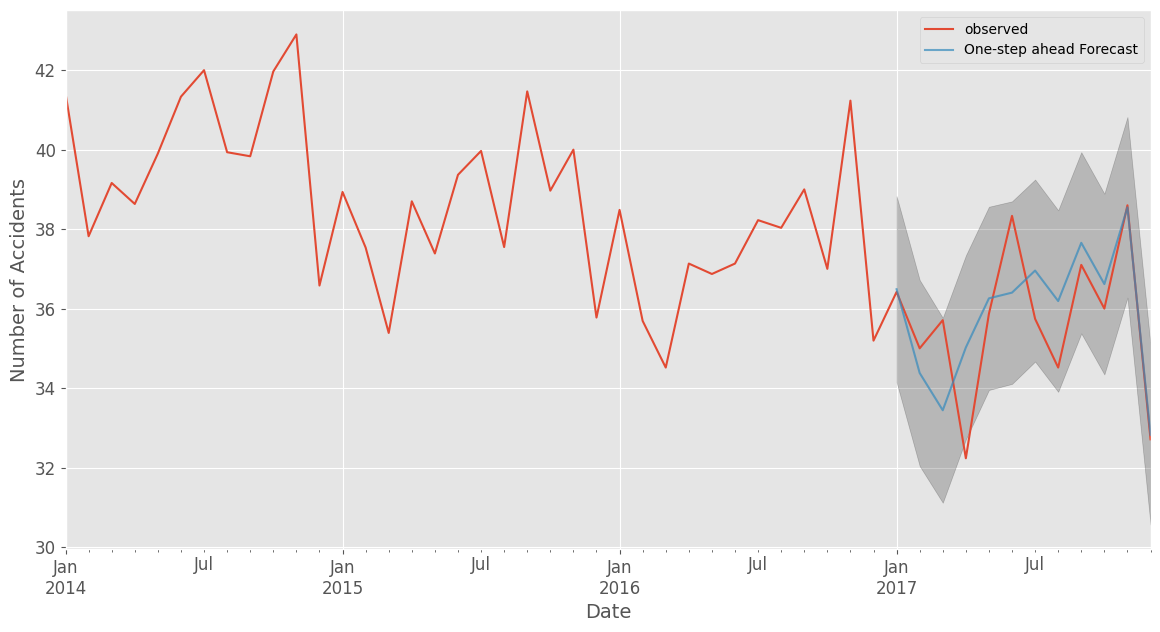

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Accidents')
plt.legend()
plt.show()

Let's find out the **MSE** to see the **accuracy** of our model. The mean squared error (MSE) is largely used as a metric to determine the performance of an algorithm. In addition, MSE is the average of the square of the difference between the observed and predicted values of a variable.

In [16]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.85


# **Visualizing Forecasts**

As we can see in the below graph the number of road accident in Dhaka will decline in the coming years

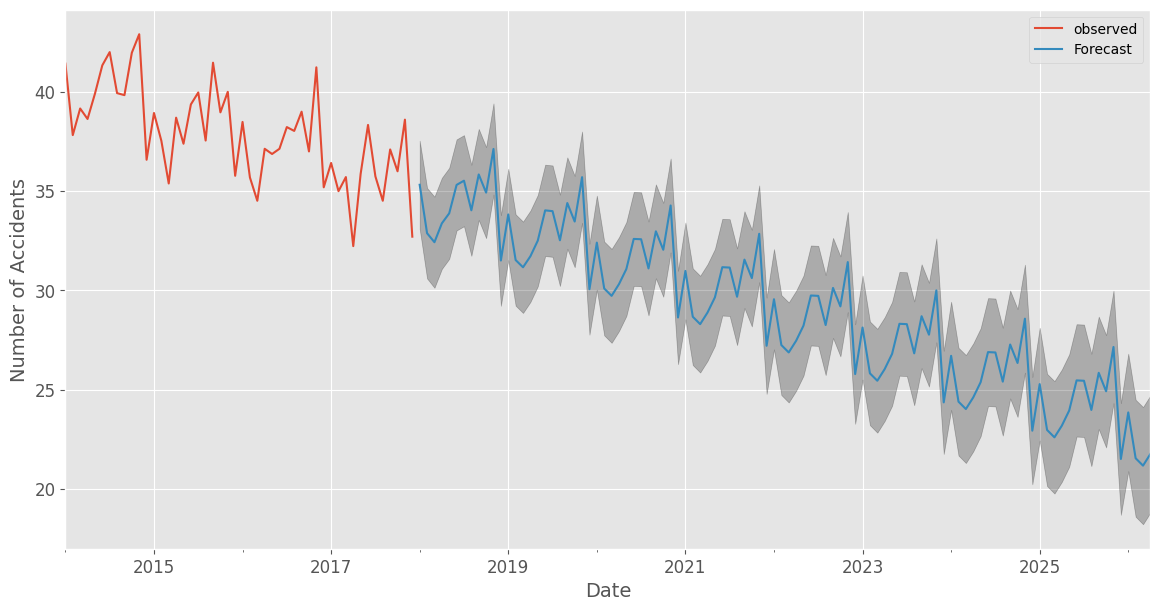

In [31]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Accidents')
plt.legend()
plt.show()

# **What is Prophet ?**

Prophet is an open source Time Series Forecasting Algorithm from Facebook and it designed for ease of use without expert knowledge on Time Series Forecasting or Statistics. Time Series Forecasting builds model by finding a best smooth line which can be represented as sum of the following component:
* Overal Growth Trend
* Early Seasonality
* Weekly Seasonality
* Holiday Affects

Benefit of Prophet Approach:
* Uneven time interval between data is not a problem
* Day with NA is not a problem
* Seasonality with multiple periods (Week & Year) is handled by default
* Works well by default setting, parameters are easily interpretable

**Sort the values by Date**

In [18]:
df = df.sort_values(by=['Date'])
df.head()

,Date,Total_Accident
0,2014-01-01,27
31,2014-01-02,41
59,2014-01-03,39
90,2014-01-04,43
120,2014-01-05,43


Prophet requires the variable names in the time series to be:
* y – Target
* ds – Datetime

So, the next step is to convert the dataframe according to the above specifications

In [19]:
df = df.rename(columns={'Date': 'ds', 'Total_Accident': 'y'})
df.head()

,ds,y
0,2014-01-01,27
31,2014-01-02,41
59,2014-01-03,39
90,2014-01-04,43
120,2014-01-05,43


# **Visualize the number of Road Accident for Each Day**

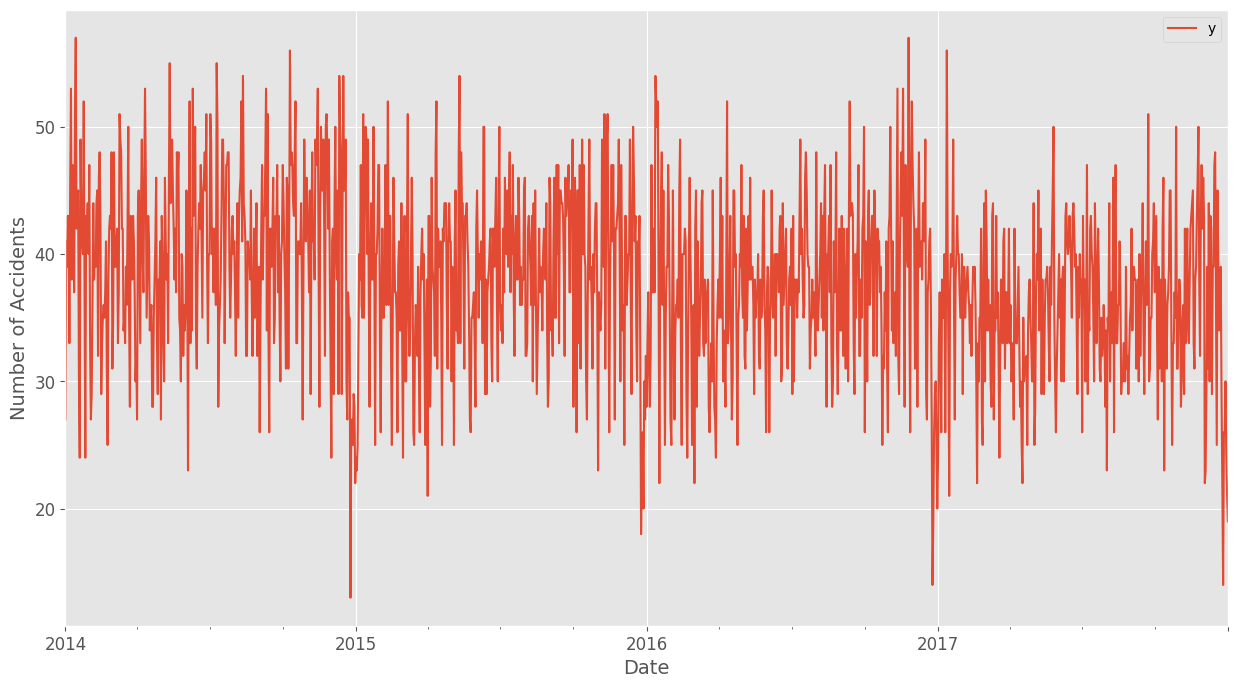

In [32]:
ax = df.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Date')

plt.show()

# **Fitting the Prophet model**

Set the **uncertainty interval** to 95% (the Prophet default is 80%)

In [22]:
from prophet import Prophet
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pf857e3/iusu8yan.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pf857e3/4ecywmed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86537', 'data', 'file=/tmp/tmp5pf857e3/iusu8yan.json', 'init=/tmp/tmp5pf857e3/4ecywmed.json', 'output', 'file=/tmp/tmp5pf857e3/prophet_modelwjjb3y95/prophet_model-20230530070239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:02:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:02:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


To create a forecast with our model we need to create some futue dates. Prophet provides us with a helper function called **make_future_dataframe**. We pass in the number of future periods and frequency. Above we created a forecast for the **next 120 months or 10 years**.

In [45]:
future_dates = my_model.make_future_dataframe(periods=84, freq='MS')
future_dates.tail()

,ds
1540,2024-08-01
1541,2024-09-01
1542,2024-10-01
1543,2024-11-01
1544,2024-12-01


As we can see in the below table. **yhat** is our forcasted value

In [46]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1540,2024-08-01,27.562889,17.153560,38.479125
1541,2024-09-01,19.669283,9.510746,30.586194
1542,2024-10-01,28.947230,18.064080,39.953770
1543,2024-11-01,29.854751,19.269081,40.542201
1544,2024-12-01,24.002806,13.016939,34.593203


# **Visualizing Forecasts**

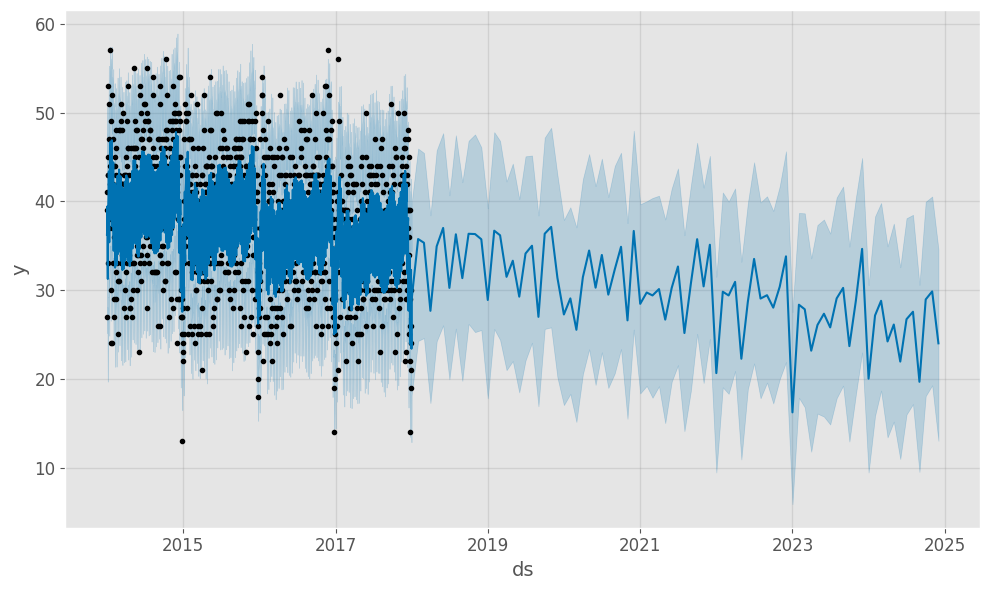

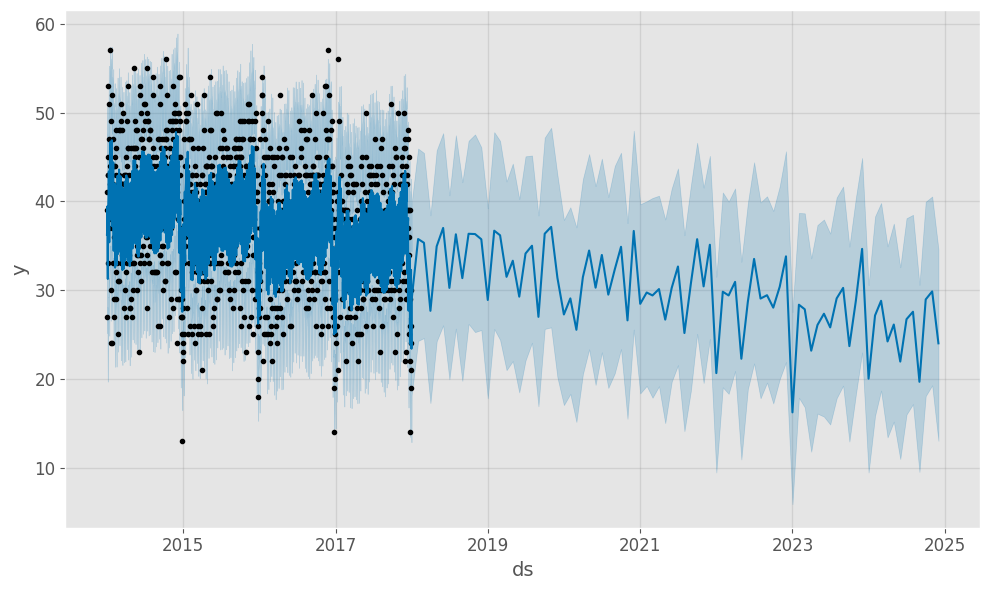

In [47]:
pd.plotting.register_matplotlib_converters()
my_model.plot(forecast, uncertainty=True)

**plot_components** provides us a graph of our trend and seasonality

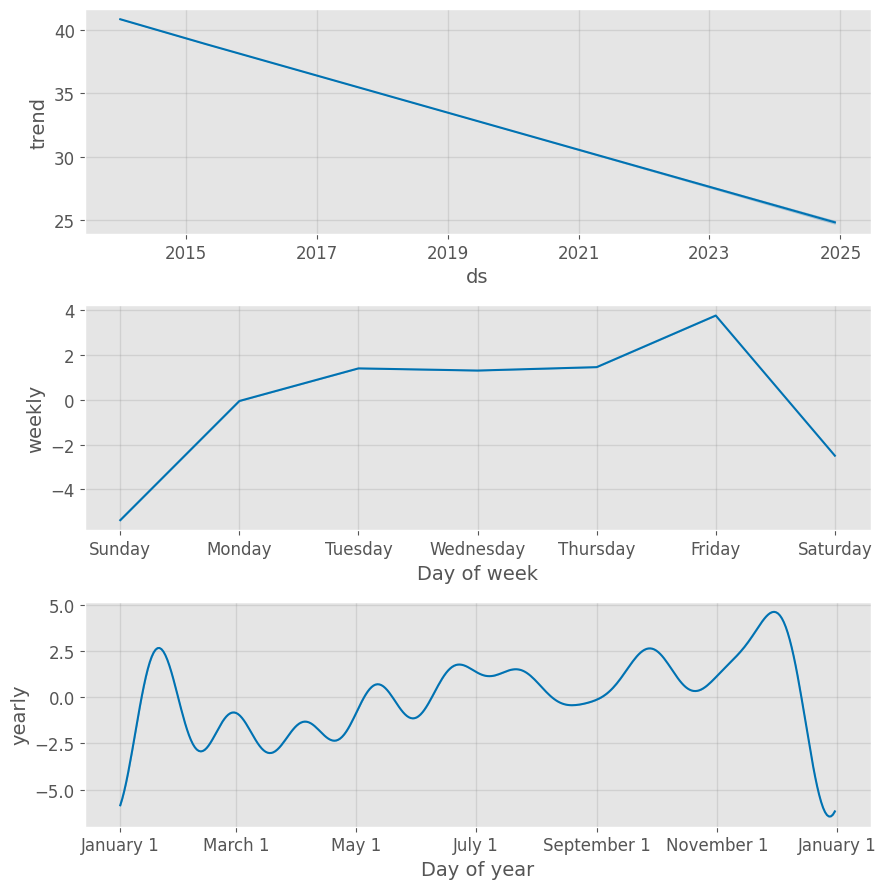

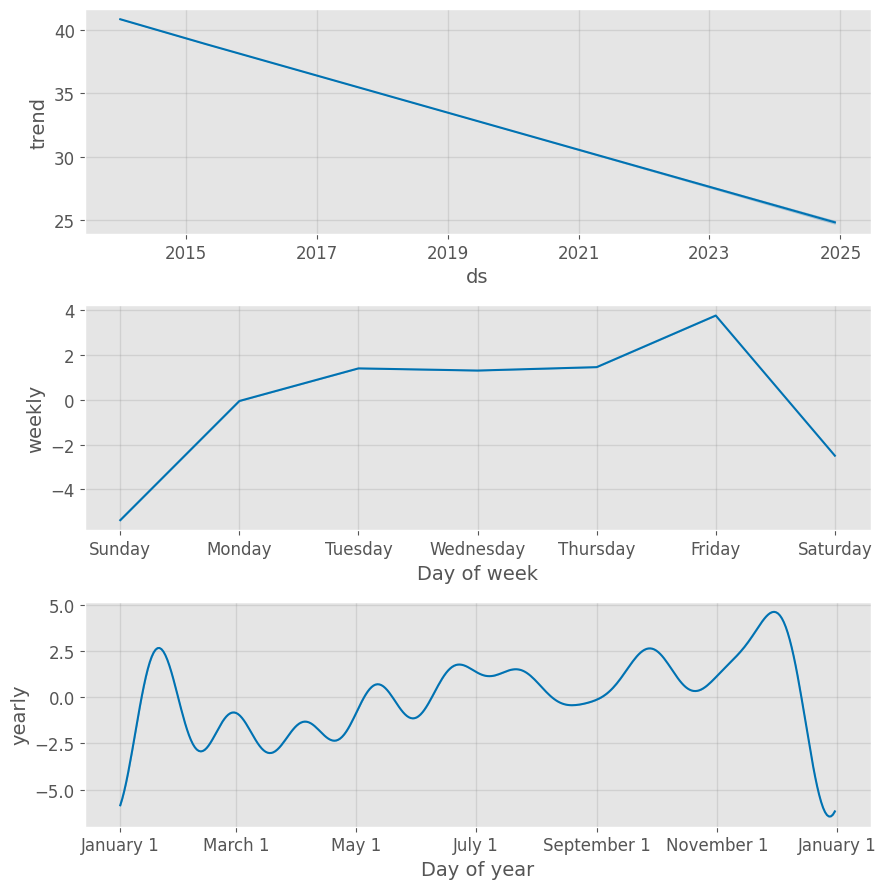

In [48]:
my_model.plot_components(forecast)

# **Evaluation of Forecasts**

In [49]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 3 forecasts with cutoffs between 2016-01-06 00:00:00 and 2016-12-31 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pf857e3/g_v43koq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pf857e3/fsmw2x67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90773', 'data', 'file=/tmp/tmp5pf857e3/g_v43koq.json', 'init=/tmp/tmp5pf857e3/fsmw2x67.json', 'output', 'file=/tmp/tmp5pf857e3/prophet_modelaufuj5dt/prophet_model-20230530073604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pf857e3/t_qu130x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5pf857e3/giwkk8i1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-07,34.557826,23.360698,45.854432,47,2016-01-06
1,2016-01-08,37.908206,26.779154,48.524744,37,2016-01-06
2,2016-01-09,32.446183,21.161958,43.321480,37,2016-01-06
3,2016-01-10,29.415114,17.761099,41.426661,42,2016-01-06
4,2016-01-11,36.227149,24.907343,48.200244,37,2016-01-06


In [50]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,35.251208,5.937273,4.492191,0.121803,0.086717,0.121049,0.923547
1,38 days,35.086552,5.923390,4.510431,0.122275,0.096456,0.121538,0.926606
2,39 days,35.383128,5.948372,4.544086,0.123136,0.096456,0.122401,0.926606
3,40 days,34.395458,5.864764,4.472260,0.121255,0.096456,0.120397,0.932722
4,41 days,33.651339,5.800977,4.433948,0.119971,0.099381,0.119216,0.935780
